In [1]:
import pandas as pd,numpy as np

In [2]:
train = pd.read_csv('train_HK6lq50.csv')

In [3]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [4]:
train.shape

(73147, 16)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [6]:
train.isna().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

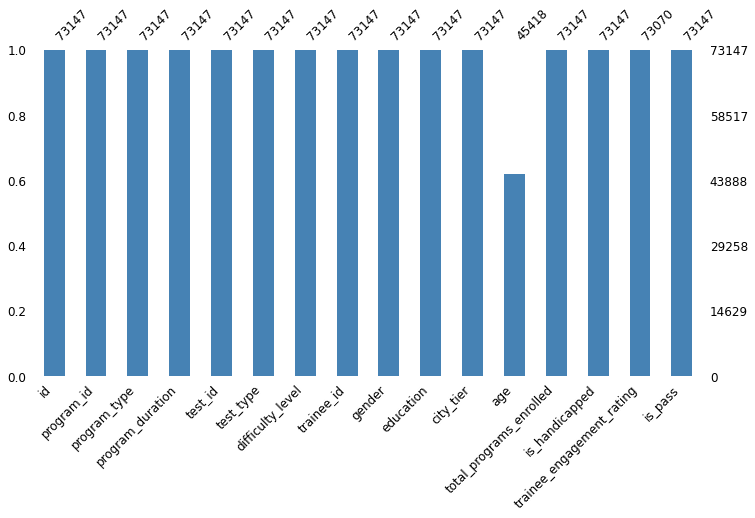

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(train, figsize=(12, 6), fontsize=12, color='steelblue')

In [9]:
features_with_na = [features for features in train.columns if train[features].isnull().sum() > 1]

In [10]:
for features in features_with_na:
  print(features, np.round(train[features].isna().mean(),4)*100 , '%')


age 37.91 %
trainee_engagement_rating 0.11 %


In [11]:
train.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [12]:
train[train['age'].isna() & train['trainee_engagement_rating'].isna()]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
3051,4392_29,T_3,T,134,29,online,easy,4392,F,Matriculation,2,NaN,4,N,NaN,1
9294,18526_98,V_1,V,133,98,offline,hard,18526,M,Bachelors,2,NaN,2,N,NaN,0
11264,12899_59,U_1,U,134,59,offline,intermediate,12899,M,High School Diploma,3,NaN,3,N,NaN,0
12211,10763_74,V_4,V,122,74,online,easy,10763,F,Matriculation,3,NaN,4,Y,NaN,1
15270,4392_28,T_3,T,134,28,online,easy,4392,F,Matriculation,2,NaN,4,N,NaN,1
15446,11930_39,T_2,T,117,39,online,easy,11930,F,Matriculation,3,NaN,6,N,NaN,1
20219,12899_57,U_1,U,134,57,offline,easy,12899,M,High School Diploma,3,NaN,3,N,NaN,1
20400,1915_27,T_3,T,134,27,online,easy,1915,F,Matriculation,2,NaN,4,N,NaN,1
20762,12899_62,U_1,U,134,62,online,easy,12899,M,High School Diploma,3,NaN,3,N,NaN,1
21280,12899_64,U_1,U,134,64,online,easy,12899,M,High School Diploma,3,NaN,3,N,NaN,0


In [13]:
train['trainee_engagement_rating'].isna().sum()

77

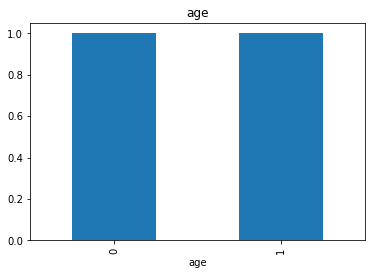

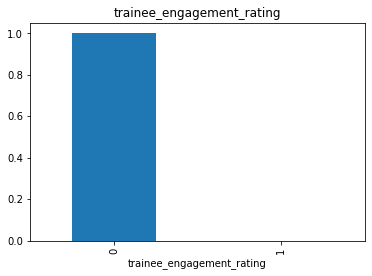

In [14]:
#Knowing whether missing values have impact on dependent variable (is_pass)
for features in features_with_na:
    data = train.copy()
  #Lets make a variable that indicate 1 if observation(record in that feature) was missing or else 0
    data[features] = np.where(data[features].isna(),1 , 0)
    #Lets calculate the mean SalesPrice where information was missing and present
    data.groupby(features)['is_pass'].median().plot.bar()
    plt.title(features)
    plt.show()

In [15]:
train['trainee_engagement_rating'].value_counts(dropna=False)

1.0    25595
2.0    17234
4.0    13113
3.0    11553
5.0     5575
NaN       77
Name: trainee_engagement_rating, dtype: int64

In [16]:
train['trainee_engagement_rating'].fillna(value = 1,inplace = True)

In [17]:
train.groupby('education')['age'].mean()

education
Bachelors              39.360736
High School Diploma    35.214935
Masters                43.587838
Matriculation          36.480293
No Qualification       34.073260
Name: age, dtype: float64

In [18]:
train['age'].isna().apply(lambda x : train['age'].mean())

0        36.494033
1        36.494033
2        36.494033
3        36.494033
4        36.494033
           ...    
73142    36.494033
73143    36.494033
73144    36.494033
73145    36.494033
73146    36.494033
Name: age, Length: 73147, dtype: float64

In [19]:
map_mean = dict(train.groupby('education')['age'].mean())

In [20]:
map_mean

{'Bachelors': 39.36073619631902,
 'High School Diploma': 35.21493461116103,
 'Masters': 43.58783783783784,
 'Matriculation': 36.48029303142217,
 'No Qualification': 34.07326007326007}

In [21]:
train.fillna(train.groupby('education').transform('mean'),inplace = True)

In [22]:
train.age.value_counts()

35.214935    14337
36.480293     9652
45.000000     4043
44.000000     3723
39.360736     3431
28.000000     3211
43.000000     3136
27.000000     3005
46.000000     2990
29.000000     2730
26.000000     2445
30.000000     2169
42.000000     2023
47.000000     1999
25.000000     1904
31.000000     1602
41.000000     1243
24.000000     1240
48.000000     1207
32.000000      969
23.000000      699
49.000000      651
33.000000      595
40.000000      562
22.000000      400
34.000000      318
39.000000      277
50.000000      276
21.000000      269
34.073260      241
56.000000      213
35.000000      210
57.000000      196
38.000000      175
51.000000      166
36.000000      138
37.000000      136
20.000000       89
55.000000       70
43.587838       68
58.000000       64
52.000000       61
19.000000       60
18.000000       45
17.000000       35
53.000000       30
54.000000       25
59.000000       16
63.000000        2
60.000000        1
Name: age, dtype: int64

In [23]:
test = pd.read_csv('test_wF0Ps6O.csv')

In [24]:
test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [25]:
test.shape

(31349, 15)

In [26]:
test.isna().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          11791
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       31
dtype: int64

In [27]:
test['trainee_engagement_rating'].fillna(value = 1,inplace = True)

In [28]:
test.fillna(test.groupby('education').transform('mean'),inplace = True)

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        73147 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         31349 non-null  object 
 1   program_id                 31349 non-null  object 
 2   program_type               31349 non-null  object 
 3   program_duration           31349 non-null  int64  
 4   test_id                    31349 non-null  int64  
 5   test_type                  31349 non-null  object 
 6   difficulty_level           31349 non-null  object 
 7   trainee_id                 31349 non-null  int64  
 8   gender                     31349 non-null  object 
 9   education                  31349 non-null  object 
 10  city_tier                  31349 non-null  int64  
 11  age                        31349 non-null  float64
 12  total_programs_enrolled    31349 non-null  int64  
 13  is_handicapped             31349 non-null  obj

In [31]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.000000,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.000000,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.000000,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,36.480293,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.000000,2,N,4.0,1


In [32]:
train['program_id'].unique()

array(['Y_1', 'T_1', 'Z_2', 'T_2', 'V_3', 'T_3', 'Y_2', 'U_1', 'Y_3',
       'X_3', 'Y_4', 'V_1', 'T_4', 'Z_1', 'S_2', 'X_2', 'V_4', 'Z_3',
       'U_2', 'X_1', 'S_1', 'V_2'], dtype=object)

In [33]:
train['program_type'].unique()

array(['Y', 'T', 'Z', 'V', 'U', 'X', 'S'], dtype=object)

In [34]:
train['test_type'].unique()

array(['offline', 'online'], dtype=object)

In [35]:
train['difficulty_level'].unique()

array(['intermediate', 'easy', 'hard', 'vary hard'], dtype=object)

In [36]:
train['gender'].unique()

array(['M', 'F'], dtype=object)

In [37]:
train['education'].unique()

array(['Matriculation', 'High School Diploma', 'Bachelors', 'Masters',
       'No Qualification'], dtype=object)

In [38]:
train['is_handicapped'].unique()

array(['N', 'Y'], dtype=object)

In [39]:
train['id'].nunique()

73147

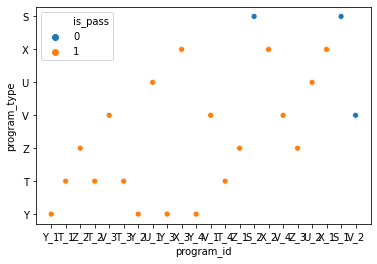

In [40]:
sns.scatterplot(data= train,y = 'program_type',x = 'program_id',hue='is_pass')

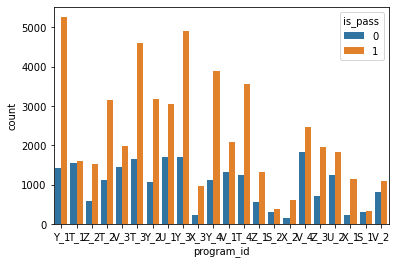

In [41]:
sns.countplot(data= train,x = 'program_id',hue='is_pass')

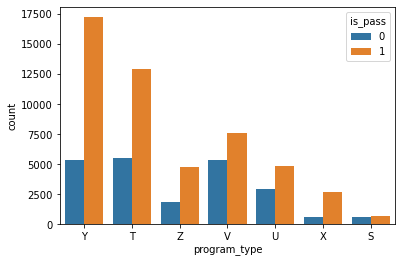

In [42]:
sns.countplot(data= train,x = 'program_type',hue='is_pass')

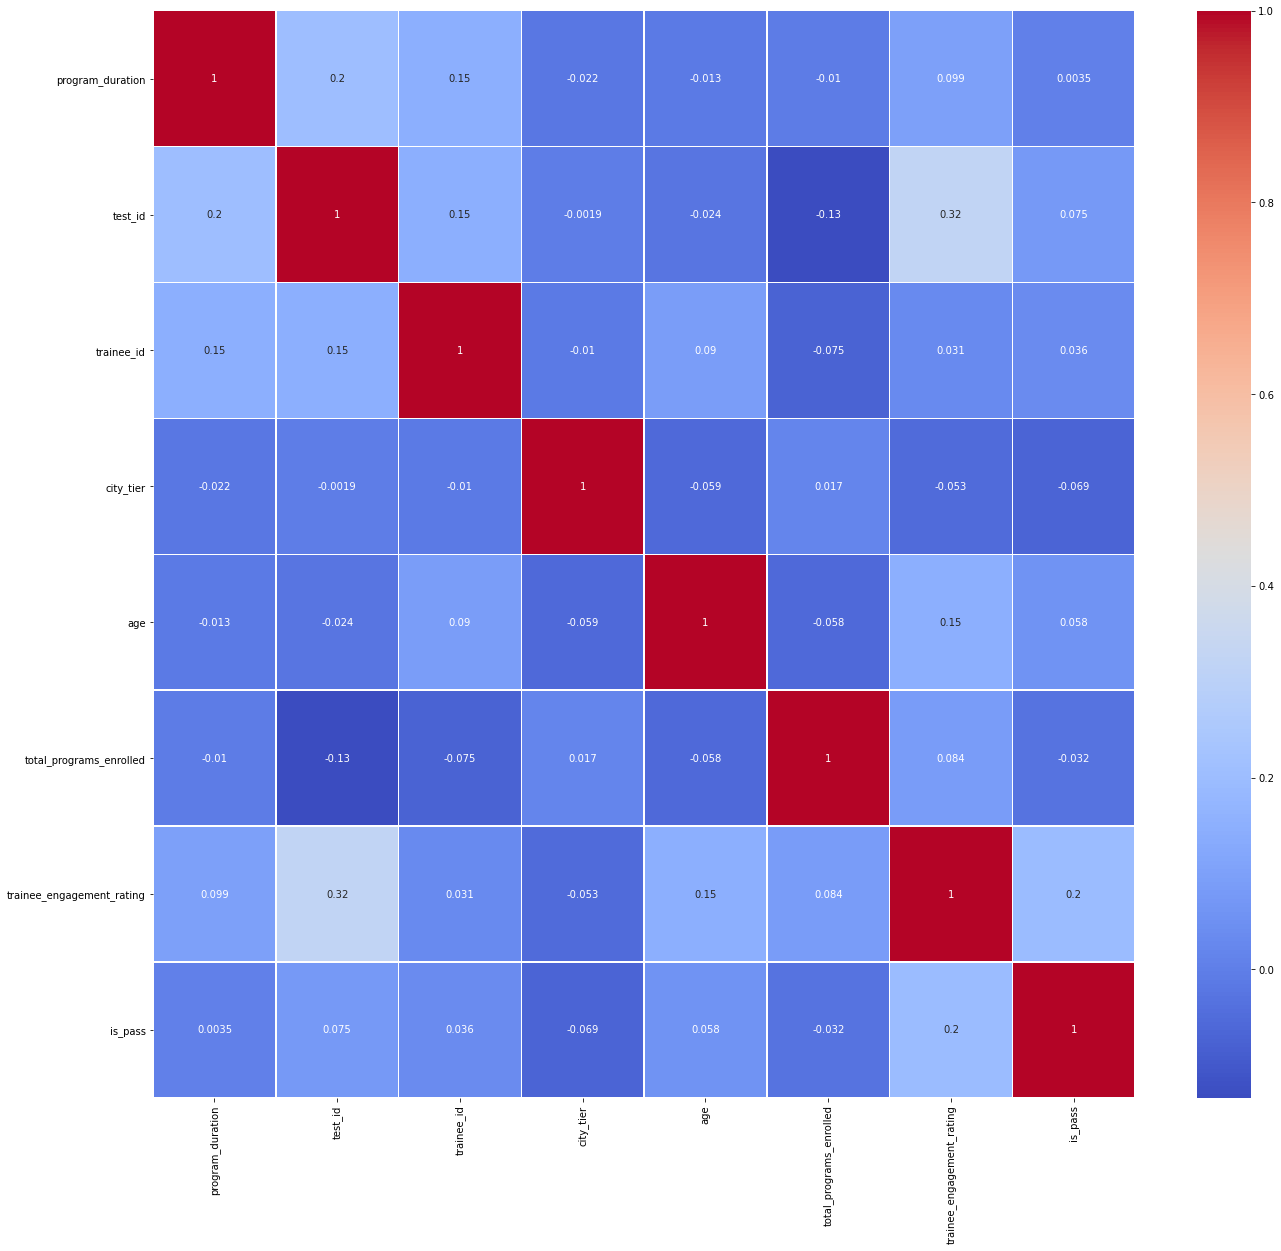

In [43]:
plt.figure(figsize = (22,20))
sns.heatmap(data = train.corr(),annot = True, cmap = 'coolwarm',linewidths=.5)

#### Performing Chi-Square for indeoendence test for two categorical variables to find wheather there is relationship between variables Program_type and Progran_id

In [44]:
#Contingency Table
contingency_table=pd.crosstab(train["program_id"],train["program_type"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 program_type    S     T     U     V     X     Y     Z
program_id                                           
S_1           644     0     0     0     0     0     0
S_2           682     0     0     0     0     0     0
T_1             0  3152     0     0     0     0     0
T_2             0  4266     0     0     0     0     0
T_3             0  6248     0     0     0     0     0
T_4             0  4792     0     0     0     0     0
U_1             0     0  4748     0     0     0     0
U_2             0     0  3073     0     0     0     0
V_1             0     0     0  3409     0     0     0
V_2             0     0     0  1896     0     0     0
V_3             0     0     0  3419     0     0     0
V_4             0     0     0  4301     0     0     0
X_1             0     0     0     0  1349     0     0
X_2             0     0     0     0   774     0     0
X_3             0     0     0     0  1205     0     0
Y_1             0     0     0     0     0  6687     0
Y_2   

In [45]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 644    0    0    0    0    0    0]
 [ 682    0    0    0    0    0    0]
 [   0 3152    0    0    0    0    0]
 [   0 4266    0    0    0    0    0]
 [   0 6248    0    0    0    0    0]
 [   0 4792    0    0    0    0    0]
 [   0    0 4748    0    0    0    0]
 [   0    0 3073    0    0    0    0]
 [   0    0    0 3409    0    0    0]
 [   0    0    0 1896    0    0    0]
 [   0    0    0 3419    0    0    0]
 [   0    0    0 4301    0    0    0]
 [   0    0    0    0 1349    0    0]
 [   0    0    0    0  774    0    0]
 [   0    0    0    0 1205    0    0]
 [   0    0    0    0    0 6687    0]
 [   0    0    0    0    0 4241    0]
 [   0    0    0    0    0 6623    0]
 [   0    0    0    0    0 5009    0]
 [   0    0    0    0    0    0 1873]
 [   0    0    0    0    0    0 2097]
 [   0    0    0    0    0    0 2659]]


In [46]:
#Expected Values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[  11.67435438  162.50771734   68.8575608   114.67455945   29.30034041
   198.6224999    58.36296772]
 [  12.3632138   172.09668202   72.92058458  121.44107072   31.02924248
   210.34246107   61.80674532]
 [  57.13907611  795.37938671  337.01712989  561.26430339  143.40787729
   972.13993739  285.65228923]
 [  77.33353384 1076.48745677  456.12787948  759.62992331  194.09200651
  1315.71985181  386.6093483 ]
 [ 113.26299096 1576.62766757  668.0466458  1112.55690596  284.26789889
  1927.00835304  566.22953778]
 [  86.86879845 1209.21891533  512.36868224  853.29268459  218.023651
  1477.94878806  434.27848032]
 [  86.07117175 1198.11590359  507.6641284   845.45777681  216.02176439
  1464.3783067   430.29094836]
 [  55.70697363  775.44443381  328.57031731  547.19708259  139.81358087
   947.77475495  278.49285685]
 [  61.79794113  860.23106894  364.4960012   607.02728752  155.100715
  1051.40388533  308.94310088]
 [  34.37045949  478.43886967  202.72350199  337.61329925

In [47]:
#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

#or
#df=b[2]
#print("Degree of Freedom:-",df)

Degree of Freedom:- 1


In [48]:
#Significance Level 5%
alpha=0.05

In [49]:
#chi-square statistic - χ2
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 126510.0


In [50]:
#critical_value
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [51]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

p-value: 0.0


In [52]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 126510.0
critical_value: 3.841458820694124
p-value: 0.0


In [53]:
#compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [54]:
# As there is arelationship between two variables we are dropping Program_id


In [55]:
print(train.shape)
print(test.shape)

(73147, 16)
(31349, 15)


In [56]:
73147+31349

104496

In [57]:
df = pd.concat([train,test])

In [58]:
df.shape

(104496, 16)

In [59]:
df.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [60]:
df['test_type'] = df['test_type'].map({'offline' : 0, 'online': 1})
df['difficulty_level'] = df['difficulty_level'].map({'intermediate': 1, 'easy' : 0, 'hard': 2, 'vary hard':3})
df['gender'] = df['gender'].map({'F' : 0, 'M': 1})
df['education'] = df['education'].map({'Matriculation':1, 'High School Diploma':2, 'Bachelors':3, 'Masters':4,
       'No Qualification':0})

df['is_handicapped'] = df['is_handicapped'].map({'Y' : 0, 'N': 1})



In [61]:
# To know value counts in particular feature and sort it with top 10
top_10 = [x for x in df.program_type.value_counts().sort_values(ascending=False).head(10).index]
top_10

['Y', 'T', 'V', 'U', 'Z', 'X', 'S']

In [62]:
# One hot encoding for only top 10 repeated features in a column and remaining to be zero
def one_hot_top_x(df, variable, top_x_lable):
    for lable in top_x_lable:
        df[variable+'_'+lable] = np.where(df[variable] == lable , 1 ,0 )

one_hot_top_x(df, 'program_type', top_10)  
df.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,...,is_handicapped,trainee_engagement_rating,is_pass,program_type_Y,program_type_T,program_type_V,program_type_U,program_type_Z,program_type_X,program_type_S
0,9389_150,Y_1,Y,136,150,0,1,9389,1,1,...,1,1.0,0.0,1,0,0,0,0,0,0
1,16523_44,T_1,T,131,44,0,0,16523,0,2,...,1,3.0,1.0,0,1,0,0,0,0,0
2,13987_178,Z_2,Z,120,178,1,0,13987,1,1,...,1,2.0,1.0,0,0,0,0,1,0,0
3,13158_32,T_2,T,117,32,0,0,13158,0,1,...,1,1.0,1.0,0,1,0,0,0,0,0
4,10591_84,V_3,V,131,84,0,1,10591,0,2,...,1,4.0,1.0,0,0,1,0,0,0,0


In [63]:
# dropping columns program_type and program_id
df.drop(['program_type','program_id'],axis = 1,inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104496 entries, 0 to 31348
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         104496 non-null  object 
 1   program_duration           104496 non-null  int64  
 2   test_id                    104496 non-null  int64  
 3   test_type                  104496 non-null  int64  
 4   difficulty_level           104496 non-null  int64  
 5   trainee_id                 104496 non-null  int64  
 6   gender                     104496 non-null  int64  
 7   education                  104496 non-null  int64  
 8   city_tier                  104496 non-null  int64  
 9   age                        104496 non-null  float64
 10  total_programs_enrolled    104496 non-null  int64  
 11  is_handicapped             104496 non-null  int64  
 12  trainee_engagement_rating  104496 non-null  float64
 13  is_pass                    731

In [65]:
#Splitting again back to Train and Test
final_train = df.iloc[:73147,:]
final_test = df.iloc[73147:,:]

In [70]:
print(final_train.shape,final_test.shape,sep = '---')

(73147, 21)---(31349, 21)


In [72]:
final_train.drop('id',axis = 1 , inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
final_train.sample(5)

,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass,program_type_Y,program_type_T,program_type_V,program_type_U,program_type_Z,program_type_X,program_type_S
5119,131,44,0,0,17464,0,1,1,27.000000,4,1,1.0,0.0,0,1,0,0,0,0,0
63047,136,159,1,0,15769,1,2,1,35.214935,2,1,4.0,1.0,1,0,0,0,0,0,0
53909,121,107,0,2,14381,1,2,2,28.000000,2,1,1.0,0.0,0,0,0,0,0,1,0
47467,121,106,0,2,12880,1,2,4,35.214935,2,0,3.0,1.0,0,0,0,0,0,1,0
23115,117,41,1,0,2345,0,1,4,27.000000,2,1,1.0,1.0,0,1,0,0,0,0,0


In [76]:
final_test.head()

,id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,...,is_handicapped,trainee_engagement_rating,is_pass,program_type_Y,program_type_T,program_type_V,program_type_U,program_type_Z,program_type_X,program_type_S
0,1626_45,131,45,0,1,1626,0,1,3,46.000000,...,1,4.0,NaN,0,1,0,0,0,0,0
1,11020_130,135,130,1,0,11020,1,3,3,39.542629,...,1,4.0,NaN,1,0,0,0,0,0,0
2,12652_146,120,146,1,0,12652,1,1,3,36.285574,...,1,3.0,NaN,1,0,0,0,0,0,0
3,7038_72,122,72,0,3,7038,0,2,1,35.156783,...,1,2.0,NaN,0,0,1,0,0,0,0
4,888_71,122,71,0,1,888,0,1,3,36.285574,...,1,2.0,NaN,0,0,1,0,0,0,0


In [77]:
final_test.drop(['id','is_pass'],axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
X_train = final_train.drop('is_pass',1)
y_train = final_train['is_pass']

In [80]:
# Gradient Boosting 
from sklearn.ensemble import  GradientBoostingClassifier
gbc1 = GradientBoostingClassifier(n_estimators=100,max_depth=6,learning_rate = 0.1)
model_gbc1 = gbc1.fit(X_train,y_train)

In [81]:
from sklearn.model_selection import cross_val_score
all_scores = cross_val_score(estimator=gbc1,X =X_train,y=y_train,cv = 5,scoring = 'roc_auc')

In [82]:
all_scores

array([0.75017372, 0.75165324, 0.75692046, 0.75125983, 0.75325954])

In [83]:
y_pred = gbc1.predict(final_test)

In [84]:
submission = pd.read_csv('sample_submission_vaSxamm.csv')

In [85]:
y_pred

array([1., 1., 1., ..., 1., 0., 1.])

In [90]:
submission.head()

,id,is_pass
0,1626_45,1
1,11020_130,1
2,12652_146,1
3,7038_72,0
4,888_71,1


In [89]:
submission['is_pass'] = y_pred
submission['is_pass'] = submission['is_pass'].astype(float).astype(int)

In [91]:
submission.to_csv('submission_1.csv',index=False)

1    50867
0    22280
Name: is_pass, dtype: int64

## Hyperopt

In [94]:
#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

In [95]:
#import
from sklearn.model_selection import StratifiedKFold

In [96]:
#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=False,random_state=100)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [97]:
#ROC function
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    #return fpr, tpr, thresholds

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,train_size=0.85,random_state=100)

In [100]:
%%time

X_trn=X_train
y_trn=y_train

X_tst=X_test
y_tst=y_test

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
def hyperopt_train_test(params):
    clf=RandomForestClassifier(**params)
    crossvalscore=cross_val_score(clf,X_trn,y_trn,n_jobs=-1,cv=5,
              scoring= 'roc_auc').mean()
    return(crossvalscore)

rf_space={
    'max_depth':hp.choice('max_depth',range(8,16)),
    'max_features':hp.choice('max_features',range(1,15)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'n_estimators': hp.choice('n_estimators', range(50,160,10)),
    'min_samples_split':hp.uniform('min_samples_split', 0, 1)
    
}

rf_best=0

def f(params):
    global rf_best
    acc=hyperopt_train_test(params)
    if acc>rf_best:
        rf_best=acc
        print('new best:', rf_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

rf_trials=Trials()
rf_best=fmin(f,rf_space,algo=tpe.suggest,max_evals=30,trials=rf_trials)


from hyperopt import space_eval
rf_best_params=space_eval(rf_space, rf_best)
print('Best:',rf_best_params)

new best:                                             
0.6595260778652197                                    
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 8, 'min_samples_split': 0.3502186305769178, 'n_estimators': 50}
new best:                                                                        
0.674648769736106                                                                
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 2, 'min_samples_split': 0.15405082449835228, 'n_estimators': 150}
new best:                                                                        
0.683061592834848                                                               
{'criterion': 'entropy', 'max_depth': 13, 'max_features': 5, 'min_samples_split': 0.1649434926532818, 'n_estimators': 140}
new best:                                                                        
0.6927070795903851                                                               
{'criterion': 'entropy', 'max_d

In [101]:
rf_best_params

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 11,
 'min_samples_split': 0.004284230290774082,
 'n_estimators': 70}

In [102]:
%%time

X_trn=X_train
y_trn=y_train

X_tst=X_test
y_tst=y_test


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#initiate
skfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
rf_clf=RandomForestClassifier(**rf_best_params)

rf_crossvalscore=cross_val_score(rf_clf,X_trn,y_trn,n_jobs=-1,cv=skfold,
            scoring= 'roc_auc')

CPU times: user 44 ms, sys: 16 ms, total: 60 ms
Wall time: 6.31 s


In [103]:
rf_crossvalscore

array([0.73369404, 0.73046413, 0.7392195 , 0.73154209, 0.73236052])

In [104]:
%%time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(**rf_best_params)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 65.3 µs


In [105]:
%%time
rf_clf.fit(X_train,y_train)

CPU times: user 7.23 s, sys: 0 ns, total: 7.23 s
Wall time: 7.23 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=11, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=0.004284230290774082,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
%%time

X_trn=X_train
y_trn=y_train

X_tst=X_test
y_tst=y_test


#import
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials

#defining
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import xgboost as xgb

xgb_space = {
    'booster '    : 'gbtree',       
    'objective'   : 'binary:logistic',
    'eval_metric' : 'auc',
    'max_depth' : hp.choice('max_depth', range(5, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(200, 2100, 100)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'reg_lambda' : hp.uniform ('reg_lambda', 0,1)
    }

xgb_train = xgb.DMatrix(X_trn.values, y_trn.values)
xgb_eval  = xgb.DMatrix(X_tst.values, y_tst.values)

def hyperopt_train_test(params):

    train_=xgb_train

    xgb_clf = xgb.cv(params,
                   train_,
                   nfold=5,
                   num_boost_round=2000,
                   early_stopping_rounds=20,
                   verbose_eval=False,
                   shuffle=True,
                   stratified=True)

    crossvalscore=list(xgb_clf['test-auc-mean'])[-1]
    return(crossvalscore)


xgb_best=0


def f(params):
    global xgb_best
    acc=hyperopt_train_test(params)
    if acc>xgb_best:
        xgb_best=acc
        print('new best:', xgb_best, params)
    return {'loss': -acc, 'status': STATUS_OK}

xgb_trials=Trials()
xgb_best=fmin(f,xgb_space,algo=tpe.suggest,max_evals=50,trials=xgb_trials)



from hyperopt import space_eval

xgb_best_params=space_eval(xgb_space, xgb_best)
print('Best:',space_eval(xgb_space, xgb_best))

new best:                                             
0.7867528                                             
{'booster ': 'gbtree', 'colsample_bytree': 0.64, 'eval_metric': 'auc', 'gamma': 0.45, 'learning_rate': 0.29, 'max_depth': 19, 'min_child_weight': 8.0, 'n_estimators': 600, 'objective': 'binary:logistic', 'reg_lambda': 0.5011509584626351, 'subsample': 0.9500000000000001}
new best:                                                                 
0.7949348                                                               
{'booster ': 'gbtree', 'colsample_bytree': 0.84, 'eval_metric': 'auc', 'gamma': 0.43, 'learning_rate': 0.04, 'max_depth': 15, 'min_child_weight': 5.0, 'n_estimators': 1800, 'objective': 'binary:logistic', 'reg_lambda': 0.1807706211078871, 'subsample': 0.78}
new best:                                                                
0.795658                                                                 
{'booster ': 'gbtree', 'colsample_bytree': 0.92, 'eval_metric': '

In [107]:
xgb_clf = xgb.XGBClassifier(**xgb_best_params)

In [108]:
%%time
xgb_clf.fit(X_train,y_train)

CPU times: user 14min 59s, sys: 7.3 s, total: 15min 6s
Wall time: 56.7 s


XGBClassifier(base_score=0.5, booster=None, booster ='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.56,
              eval_metric='auc', gamma=0.23, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.01,
              max_delta_step=0, max_depth=18, min_child_weight=4.0, missing=nan,
              monotone_constraints=None, n_estimators=1600, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.8145045384269433, scale_pos_weight=1,
              subsample=0.7000000000000001, tree_method=None,
              validate_parameters=False, verbosity=None)

In [113]:
%%time
y_pred_xgb = xgb_clf.predict(final_test)

CPU times: user 31.2 s, sys: 12 ms, total: 31.2 s
Wall time: 1.96 s


In [114]:
y_pred_xgb

array([1., 1., 1., ..., 1., 0., 1.])

In [115]:
submission['is_pass'] = y_pred_xgb
submission['is_pass'] = submission['is_pass'].astype(float).astype(int)

In [116]:
submission.to_csv('submission_xgb.csv',index=False)